# Overfitting the test set

- Load `cancer.csv` dataset
- Scale the feature set
- Split data into first trainval and test, then split trainval into validation and train datasets
- Fit train dataset for `k=5` neighbors
- print the score on validation and test datasets

In [1]:
import pandas as pd
data = pd.read_csv('cancer.csv')

In [2]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
data.describe()
# std stands for standard deviation

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
X = data.drop('y',axis=1)
# axis=1 means the corresponding column
# axis=0 means the corresponding row

In [5]:
y = data.y

In [8]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [11]:
# type(X)
# X is a DataFrame

###Ways to Slice DataFrames

In [9]:
X.iloc[:,0]
# iloc can slice DataFrame by numerical input
# Output type: pandas.Series
# Series: 1D labeled array capable of holding any data type.

0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: mean radius, Length: 569, dtype: float64

In [12]:
X.loc[:,'mean radius']
# loc can slice DataFrame by string input
# Output type: pandas.Series

0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: mean radius, Length: 569, dtype: float64

In [13]:
X['mean radius']

0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: mean radius, Length: 569, dtype: float64

In [14]:
X[['mean radius']]

,mean radius
0,17.99
1,20.57
2,19.69
3,11.42
4,20.29
...,...
564,21.56
565,20.13
566,16.60
567,20.60


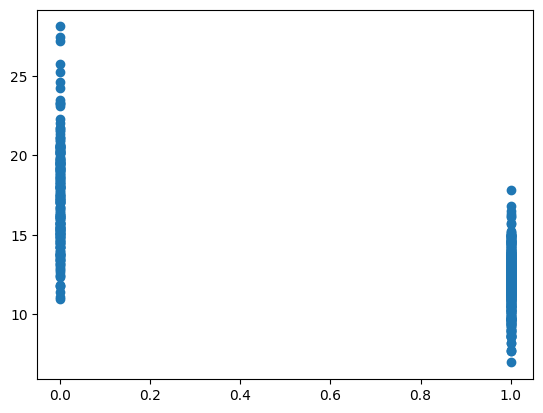

In [15]:
import matplotlib.pyplot as plt
plt.scatter(y, X.iloc[:,0])

In [16]:
first_column = X.iloc[:,0]

In [17]:
(first_column - first_column.mean()).mean()
# Scale, only for numerical features

-4.995028019403165e-16

In [18]:
from sklearn.preprocessing import scale
X_s = scale(X)

In [19]:
type(X_s)

numpy.ndarray

In [20]:
X_s[:,0].mean()

-1.3736327053358703e-16

In [21]:
X.iloc[:,0].mean()

14.127291739894552

In [22]:
X_s[:,0].std(0)

1.0

In [ ]:
len(X_s)
#

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X_s,y,random_state=0)

In [ ]:
X_val[:10]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_s,y,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import numpy as np
np.unique(y)
# This is why we use classifier other than linear one

In [ ]:
knn5 = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn5.fit(X_train, y_train)

In [ ]:
print(knn5.score(X_val, y_val))
print(knn5.score(X_test, y_test))

- Create a loop and fit your train dataset and test your validation dataset for `k=1,15,2`.
- Print the best validation score out of three neighbors and determine the `k` value with the highest score, $best_n$
- Retrain your model with trainvalidation dataset for $k=best_n$
- Print the score for test dataset for the latest trained model

In [ ]:
neighbors = np.arange(1,15,2)

In [ ]:
for i in neighbors:
  print(i)

In [ ]:
import numpy as np
scores = []
for i in neighbors:
  knni = KNeighborsClassifier(n_neighbors=i)
  knni.fit(X_train, y_train)
  sc_i = knni.score(X_val, y_val)
  scores.append(sc_i)
  # print(f'For {i} number of neighbors:')
  # print(knni.score(X_val, y_val))
bestin = np.argmax(scores)
best_n = neighbors[bestin]

knnbest = KNeighborsClassifier(n_neighbors = best_n)
knnbest.fit(X_trainval, y_trainval)
print(knnbest.score(X_test, y_test))

In [ ]:
best_n

In [ ]:
scores

In [ ]:
np.max(scores)

In [ ]:
np.argmax(scores)
# Find the index of the max value

In [ ]:
scores.index(max(scores))
# Find the index of the max value

In [ ]:
neighbors

In [ ]:
neighbors[2]

# Cross validation

- Import `cross_val_score` from `sklearn.model_selection`
- Split your data into train and test datasets
- For `neighbors=1, 15, 2`, compute cross validation scores for trainvalidation dataset with kfold=10.
- Print the best validation score out of three neighbors and determine the `k` value with the highest score, $best_n$
- Retrain your model with trainvalidation dataset for $k=best_n$
- Print the score for test dataset for the latest trained model

X_train, X_val, X_test

For each neighbor value:
X_train, X_test
Splitting X_train into 10 folds
Split1: F1 will be used for vali
Split2
.
.
.
Split10: F10

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
np.set_printoptions(precision=2)
neighbors =  np.arange(1,15,2)
for i in neighbors:
  knni =  KNeighborsClassifier(n_neighbors=i)
  print(f'For {i} number of neighbors:')
  print(cross_val_score(knni, X_train, y_train, cv=10))
  print()

In [ ]:
np.set_printoptions(precision=2)
neighbors =  np.arange(1,15,2)
for i in neighbors:
  knni =  KNeighborsClassifier(n_neighbors=i)
  score_cross = cross_val_score(knni, X_train, y_train, cv=10)
  print(f'For {i} number of neighbors:')
  print(np.mean(score_cross))
  print()

In [ ]:
np.set_printoptions(precision=2)
neighbors =  np.arange(1,15,2)
crossscores = []
for i in neighbors:
  knni =  KNeighborsClassifier(n_neighbors=i)
  score_cross = cross_val_score(knni, X_train, y_train, cv=10)
  crossscores.append(score_cross)
best_i = np.argmax(crossscores)
best_n = neighbors[best_i]
knnbest = KNeighborsClassifier(n_neighbors = best_n)
knnbest.fit(X_train, y_train)
final_score = knnbest.score(X_test.values, y_test.values)
print(final_score)

# GridSearchCV

- Import `GridSearchCV` from `sklearn.model_selection`
- Split your data into train and test datasets
- For `neighbors=1 to 30`, compute `GridSearchCV` for train dataset with kfold=10.
- Print the best cross validation score
- Priont the best parameter
- Print the test score

GridSearchCV(estimator,param_grid, cv=10)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
params = {'n_neighbors': np.arange(1,15,2)}

In [ ]:
mygrid = GridSearchCV(knn, param_grid=params, cv=10, return_train_score=True)

In [ ]:
mygrid.fit(X_train, y_train)

In [ ]:
mygrid.cv_results_

In [ ]:
mygrid.best_params_

In [ ]:
mygrid.best_estimator_

In [ ]:
mygrid.score(X_test, y_test)

In [ ]:
results = pd.DataFrame(mygrid.cv_results_)

In [ ]:
results.columns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
results['mean_train_score']
# n_neighbors = 1 -> score 1.0000

In [ ]:
results['param_n_neighbors']

In [ ]:
plt.plot(results['param_n_neighbors'],results['mean_train_score'])
plt.plot(results['param_n_neighbors'],results['mean_test_score'])
plt.legend(['trainning scores','test scores'])